In [0]:
#do import 
import tensorflow as tf 
import numpy as np
import os 
from tensorflow import keras

I . First model: binary classification dammage or not

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [0]:
pwd

'/content'

In [0]:
preview = '/content/drive/My Drive/Final_Project/data1a/training/whole/'

In [0]:
"""
img = load_img('/content/drive/My Drive/Final_Project/data1a/training/whole/0015.jpg')
x =img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1
                            ,save_to_dir=preview, save_prefix='000', save_format='jpg'):
    
  i+=1
  if i >20:
    break"""

"\nimg = load_img('/content/drive/My Drive/Final_Project/data1a/training/whole/0015.jpg')\nx =img_to_array(img)\nx = x.reshape((1,) + x.shape)\ni=0\nfor batch in datagen.flow(x, batch_size=1\n                            ,save_to_dir=preview, save_prefix='000', save_format='jpg'):\n    \n  i+=1\n  if i >20:\n    break"

In [0]:
# Load data from differents folder 

In [0]:
def load_dataset():
  batch_size = 16
  #train augmantation we will use for training
  train_datagen= ImageDataGenerator(
      rescale= 1/255,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip  =True
  )
  # test augmentation
  test_datagen = ImageDataGenerator(rescale=1/255)

  #generator we will used for reading founded pictures in our train folder
  train_generator = train_datagen.flow_from_directory(
      '/content/drive/My Drive/Final_Project/dataset2/training/',
      target_size=(150,150),
      batch_size= batch_size,
      class_mode= 'binary')
  
  test_generator = test_datagen.flow_from_directory(
      '/content/drive/My Drive/Final_Project/dataset2/validation/',
      target_size= (150,150),
      batch_size=batch_size,
      class_mode='binary')
  
  return train_generator, test_generator




In [0]:
train , test = load_dataset()

Found 3133 images belonging to 2 classes.
Found 1884 images belonging to 2 classes.


In [0]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [0]:
#Implement CNN model for classifing our dataset 

In [0]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 

In [0]:
def model():

  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape=(150,150, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  
  model.summary()
  
  return model

In [0]:
my_model = model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [0]:
my_model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
batch_size =32

In [0]:
modele_file = '/content/drive/My Drive/Final_Project/Models/saved_model/model1.h5'

In [0]:
history =my_model.fit_generator(train, steps_per_epoch=2000// batch_size,
                       epochs=50,
                       validation_data= test,
                       validation_steps = 800// batch_size)
import pickle 
with open(modele_file, 'wb') as file1:
  pickle.dump(my_model, file1)

Epoch 1/50
62/62 [==============================] - 13s 208ms/step - loss: 0.4385 - accuracy: 0.8730 - val_loss: 0.6052 - val_accuracy: 0.8925
Epoch 2/50
62/62 [==============================] - 12s 190ms/step - loss: 0.3220 - accuracy: 0.8740 - val_loss: 0.4332 - val_accuracy: 0.8575
Epoch 3/50
62/62 [==============================] - 13s 202ms/step - loss: 0.3278 - accuracy: 0.8645 - val_loss: 0.2314 - val_accuracy: 0.8375
Epoch 4/50
62/62 [==============================] - 13s 217ms/step - loss: 0.3249 - accuracy: 0.8760 - val_loss: 0.4033 - val_accuracy: 0.8900
Epoch 5/50
62/62 [==============================] - 12s 186ms/step - loss: 0.4350 - accuracy: 0.8669 - val_loss: 0.1463 - val_accuracy: 0.8283
Epoch 6/50
62/62 [==============================] - 12s 195ms/step - loss: 0.3190 - accuracy: 0.8868 - val_loss: 0.0378 - val_accuracy: 0.9075
Epoch 7/50
62/62 [==============================] - 12s 188ms/step - loss: 0.3331 - accuracy: 0.8746 - val_loss: 0.2163 - val_accuracy: 0.8550

Ploting Validation accuracy and loss validation 

In [0]:
import matplotlib.pyplot as plt


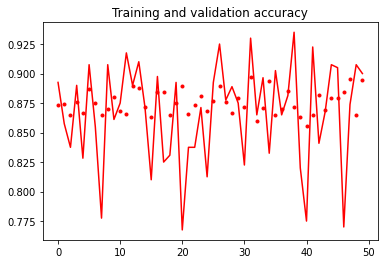

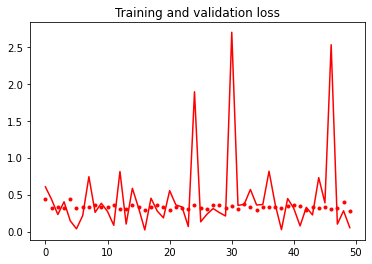

In [0]:
def plot_training(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

**II. Model 2 Dammage Classification **

---



In [0]:
full_dataset = '/content/drive/My Drive/Final_Project/raw/'
from keras.applications.vgg16 import preprocess_input

In [0]:
#loading dataset
image_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest', validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=full_dataset,
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

test_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=full_dataset,
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1369 images belonging to 8 classes.
Found 338 images belonging to 8 classes.


In [0]:
labels = ['bumper_dent', 'bumper_scratch', 'door_dent', 'door_scratch',
          'glass_shatter', 'head_lamp', 'tail_lamp', 'Unknow']

In [0]:
len(labels)

8

In [0]:
from keras.models import Model
from keras.layers import  GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3

In [0]:

from keras.applications.vgg16 import VGG16

In [0]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

# our layers
x = Flatten()(vgg.output)
#x = Dense(64, activation='relu')(x)
prediction = Dense(len(labels), activation='softmax')(x)


# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
____________________________________________________________

In [0]:
model.compile(optimizer =tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [0]:
model.fit(x = train_dataset, validation_data=test_dataset, epochs=30)

Fine Tuning

In [0]:
from keras.optimizers import SGD
MODEL_FILE = '/content/drive/My Drive/Final_Project/Models/saved_model/model2.h5'


In [0]:

for layers in model.layers:
  layers.trainable = False

opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])  

epochs = 20
model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)
with open(MODEL_FILE, 'wb') as file2:
  pickle.dump(model, file2)

In [0]:

def prediction(img, model1, model2):
   x = image.img_to_array(img)
   x = np.expand_dims(x, axis=0)
   x = preprocess_input(x)
   pred1 = model1.predict(x)
   if pred1[0][0] < 0.7:
     pred2= model2.predict(x)
     return pred2[0].argmax(), pred1
   else: 
     return('Aucun dommage detecter sur votre vehicul')


In [0]:
from tensorflow.keras.preprocessing import image
from keras.models import load_model
img =image.load_img('/content/drive/My Drive/Final_Project/dataset2/validation/00-damage/0084.JPEG',  target_size=(150,150))

In [0]:
train.labels.shape

NameError: ignored

In [0]:
model1 = load_model(modele_file)
model2 = load_model(MODEL_FILE)
pred, x = prediction(img,model1, model2)

ValueError: ignored